In [1]:
import numpy as np
import numpy.random as rng
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series
from sympy import symbols, integrate, exp, oo
%matplotlib inline
import pandas as pd
from scipy.stats import t
from scipy.stats import expon
from scipy.stats import halfcauchy
from scipy.stats import norm
import numpy as np
import math
from scipy.stats import gamma

In [46]:
x=np.arange(10)
y=np.random.normal(-2+x*5, 2)
print(x, y)

[0 1 2 3 4 5 6 7 8 9] [ -1.49389159   6.702206     8.44003567  14.38401142  21.55280142
  23.34869719  26.73749104  31.64942897  36.18057307  45.16476918]


In [47]:
n=1000
lam=np.zeros(n)
gam=np.zeros(n)
alpha=np.zeros(n)
beta=np.zeros(n)
lam[0]=.5
gam[0]=.5
alpha[0]=0
beta[0]=0


a=1
b=1
import time


In [51]:
def update_phi(lam_star, prev_phi, prev_alph, prev_beta):
    r1=sum(norm.logpdf(y,  loc=prev_alph+prev_beta*x, scale=1/np.sqrt(lam_star)))+gamma.logpdf(lam_star, a, scale=b)
    r2=sum(norm.logpdf(y,  loc=prev_alph+prev_beta*x, scale=1/np.sqrt(prev_phi)))+gamma.logpdf(prev_phi, a, scale=b)
    log_rl=r1-r2
    if exp(log_rl)>exp(meas) and m_lam_star>0:
        new_phi=lam_star
    else:
        new_phi=lam[i-1]
    return(new_phi)

def update_alpha(alpha_star, prev_phi, prev_alpha, prev_beta):
    a1=sum(norm.logpdf(y, loc=alpha_star+prev_beta*x, scale=1/np.sqrt(prev_phi)))+norm.logpdf(alpha_star, 0, 10)
    a2=sum(norm.logpdf(y, loc=prev_alpha+prev_beta*x, scale=1/np.sqrt(prev_phi)))+norm.logpdf(prev_alpha, 0, 10)
    log_ra=a1-a2
    if exp(log_ra)>exp(meas):
        new_alpha=alpha_star
    else:
        new_alpha=prev_alpha
    return(new_alpha)

def update_beta(beta_star, prev_phi, prev_alpha, prev_beta):
    b1=sum(norm.logpdf(y, loc=prev_alpha+beta_star*x, scale=1/np.sqrt(prev_phi)))+norm.logpdf(beta_star, 0, 10)
    b2=sum(norm.logpdf(y, loc=prev_alpha+prev_beta*x, scale=1/np.sqrt(prev_phi)))+norm.logpdf(prev_beta, 0, 10)    
    log_rb=b1-b2
    if exp(log_rb)>exp(meas):
        new_beta=beta_star
    else:
        new_beta=prev_beta
    return(new_beta)


In [55]:
start = time.clock()
for i in range(1, n):
    alpha_star=np.random.normal(alpha[i-1], 2)
    beta_star=np.random.normal(beta[i-1], 2)
    m_lam_star=np.random.normal(gam[i-1], 3)
    if(m_lam_star>0):
        lam_star=m_lam_star
    else:
        lam_star=lam[i-1]
        
    meas=math.log(np.random.uniform(0,1))    
    
    lam[i]=update_phi(lam_star, lam[i-1], alpha[i-1], beta[i-1])
    alpha[i]=update_alpha(alpha_star, lam[i-1], alpha[i-1], beta[i-1])
    beta[i]=update_beta(beta_star, lam[i-1], alpha[i-1], beta[i-1])

dt_mh_1000 = time.clock() - start
print('Time:', dt_mh_1000)

Time: 2.2116492539876162


1.94204928223 -0.371699027357 4.78621772856


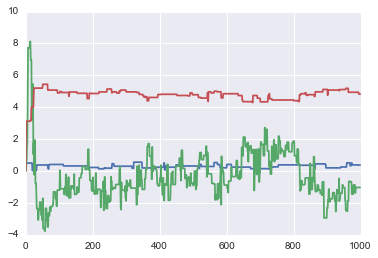

In [56]:
from numpy import mean

print(mean(1/np.sqrt(lam)), mean(alpha), mean(beta))

plt.plot(lam)
plt.plot(alpha)
plt.plot(beta)

y_sim=mean(alpha)+mean(beta)*x

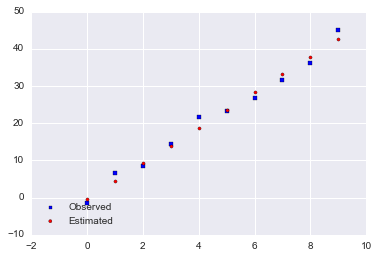

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='Observed')
ax1.scatter(x, y_sim, s=10, c='r', marker="o", label='Estimated')
plt.legend(loc='lower left');
plt.show()

In [37]:
print(np.sum(y)/np.sum(x))

5.06315798418


In [58]:
n_y=10
n=1000
tau=np.zeros(n)+1
gam=np.zeros(n)
alpha=np.zeros(n)
beta=np.zeros(n)
alpha[0]=0
beta[0]=2
tau[0]=1

a=1
b=1
import time
tnot=1
print(mean(beta), mean(tau))

for i in range(1, n):
    s_n=np.sum(x**2)+tnot
    mu_n=(1/s_n)*(np.sum(x*y))
    beta[i]=norm.rvs(mu_n, (1/np.sqrt(tau[i-1]))*(1/np.sqrt(s_n)))
    tau[i]=gamma.rvs(a+n_y/2, 1/(np.sum(y**2) -mu_n*s_n*mu_n))

print(beta[0:20])

0.002 1.0
[ 2.          4.67543104  4.68726147  4.72515657  4.71897729  4.73589101
  4.69313323  4.71059483  4.7048906   4.76572202  4.68651607  4.70065452
  4.66533065  4.67451083  4.66748043  4.73235602  4.74551414  4.71149181
  4.74073347  4.70140367]


8.12959860942


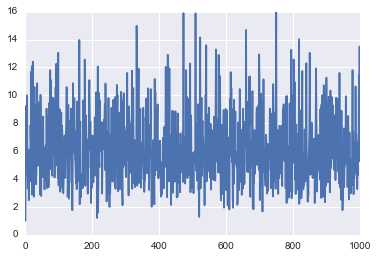

In [59]:
plt.plot(tau)
print(gamma.rvs(a+n_y/2, 1/(b+np.sum((y-(x*beta[i-1]))**2)/2)))

In [60]:
burn_in=n/2
print(mean(beta[burn_in:n]), mean(1/np.sqrt(tau[burn_in:n])))

4.71214123472 0.43139242827


C:\Users\Jody\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


C:\Users\Jody\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


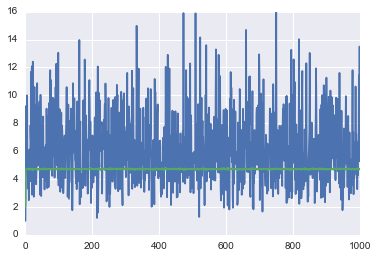

In [61]:
from numpy import mean

plt.plot(tau)
plt.plot(beta)

y_sim=norm.rvs(x*mean(beta[burn_in:n]), 1/np.sqrt(mean(tau[burn_in:n])))

[0 1 2 3 4 5 6 7 8 9] [  4.11041832   8.7096047    9.14511461  13.30320855  24.05593802
  26.76575757  34.76569795  35.51748072  37.52975908  46.33325535]


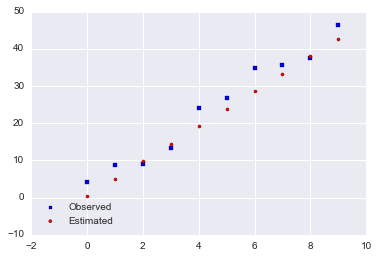

[  4.11041832   8.7096047    9.14511461  13.30320855  24.05593802
  26.76575757  34.76569795  35.51748072  37.52975908  46.33325535]
[0 1 2 3 4 5 6 7 8 9]


In [62]:
x=np.arange(10)
y=np.random.normal(x*5, 2)

print(x, y)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='Observed')
ax1.scatter(x, y_sim, s=10, c='r', marker="o", label='Estimated')
plt.legend(loc='lower left');
plt.show()
print(y)
print(x)